### Importação dos dados

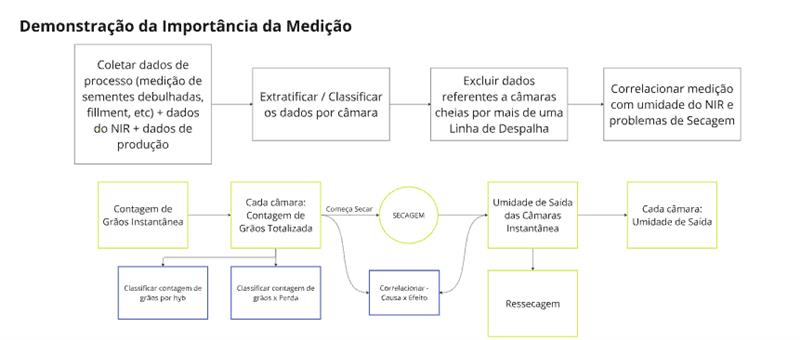

In [47]:
import os
import pandas as pd
import numpy as np

output_dir = "Dados_Consolidados"

DF_BAYER = pd.read_pickle(os.path.join(output_dir, "DF_BAYER.pkl"))
DF_DP = pd.read_pickle(os.path.join(output_dir, "DF_DP.pkl"))
DF_DB1 = pd.read_pickle(os.path.join(output_dir, "DF_DB1.pkl"))
DF_DB2 = pd.read_pickle(os.path.join(output_dir, "DF_DB2.pkl"))

### Cruzamento dos dados BAYER com dados TAGNA

Contagem de grãos (DP) -> arquivo BAYER -> Debulha

In [48]:
def delete_non_single_lines(df):
    df = df.copy()
    linha_unica = df.groupby("Controle Secagem")["Linha Descarga"].nunique() == 1
    controles_secagem_de_linha_unica = linha_unica[linha_unica].index.tolist()
    df = df[df["Controle Secagem"].isin(controles_secagem_de_linha_unica)]
    return df


# Converter em timestamp
for col in ["Início Descarga", "Término Descarga", "Início Secagem", "Término Secagem", "Início Debulha", "Término Debulha"]:
    DF_BAYER[col] = pd.to_datetime(DF_BAYER[col], dayfirst=True)

# Eliminar dados referentes a câmaras enchidas por mais de uma linha de despalha
DF_BAYER = delete_non_single_lines(DF_BAYER)

# Apenas da Linha 2 onde está o Contador de Grãos
DF_BAYER = DF_BAYER[DF_BAYER["Linha Descarga"] == 2].drop_duplicates().sort_values(by="Início Descarga")

In [49]:
DF_BAYER.columns.to_list()

['Híbrido RNC/Linhagem_QUA',
 'Umidade (%)',
 'Início Descarga',
 'Término Descarga',
 'Linha Descarga',
 'Controle Secagem',
 'Secador.Câmara',
 'Peso Total RW  (kg)',
 'Altura camada (m)',
 'Início Secagem',
 'Inversão Câmara',
 'Término Secagem',
 'Ressecagem',
 'Secagem (horas) Atividade 2010',
 'Início Debulha',
 'Término Debulha',
 'Umidade mínima (%)',
 'Umidade máxima (%)',
 'Umidade debulha média (%)',
 'Desvio Padrão (%)',
 'Umidade Média de Fechamento AvM%']

In [50]:
DF_BAYER

Híbrido RNC/Linhagem_QUA  Umidade (%)     Início Descarga  \
167                DKB260PRO4         32.7 2025-05-29 20:20:00   
170                DKB260PRO4         32.4 2025-05-29 22:53:00   
174                DKB260PRO4         32.6 2025-05-30 01:30:00   
169                DKB260PRO4         33.5 2025-05-30 03:29:00   
180                DKB260PRO4         33.3 2025-05-30 22:35:00   
...                       ...          ...                 ...   
2490                 8704PRO4         30.6 2025-07-21 21:25:00   
2493                 8704PRO4         25.2 2025-07-21 23:30:00   
2494                 8704PRO4         25.2 2025-07-21 23:30:00   
2495                 8704PRO4         26.4 2025-07-22 01:30:00   
2501                 8704PRO4         28.7 2025-07-22 03:20:00   

        Término Descarga  Linha Descarga Controle Secagem Secador.Câmara  \
167  2025-05-29 22:29:00               2               46          D2.04   
170  2025-05-30 00:11:00               2               46          D2.04   
174  2025-05-30 02:53:00               2               46          D2.04   
169  2025-05-30 10:55:00               2               48          D2.01   
180  2025-05-30 23:49:00               2               50          D2.06   
...                  ...             ...              ...            ...   
2490 2025-07-21 22:59:00               2              602          D2.11   
2493 2025-07-22 00:58:00               2              602          D2.11   
2494 2025-07-22 00:58:00               2              604          D2.06   
2495 2025-07-22 03:00:00               2              604          D2.06   
2501 2025-07-22 04:40:00               2              604          D2.06   

      Peso Total RW  (kg)  Altura camada (m)      Início Secagem  ...  \
167               90270.0                2.8 2025-05-30 03:00:00  ...   
170               90270.0                2.8 2025-05-30 03:00:00  ...   
174               90270.0                2.8 2025-05-30 03:00:00  ...   
169               29560.0                2.0 2025-05-30 11:45:00  ...   
180               89470.0                3.0 2025-05-31 07:00:00  ...   
...                   ...                ...                 ...  ...   
2490              71835.0                2.8 2025-07-22 00:02:00  ...   
2493              71835.0                2.8 2025-07-22 00:02:00  ...   
2494              71575.0                2.8 2025-07-22 04:47:00  ...   
2495              71575.0                2.8 2025-07-22 04:47:00  ...   
2501              71575.0                2.8 2025-07-22 04:47:00  ...   

         Término Secagem Ressecagem Secagem (horas) Atividade 2010  \
167  2025-06-02 21:00:00        NÃO                        90.0000   
170  2025-06-02 21:00:00        NÃO                        90.0000   
174  2025-06-02 21:00:00        NÃO                        90.0000   
169  2025-06-03 03:00:00        NÃO                        87.2500   
180  2025-06-04 03:30:00        NÃO                        92.5000   
...                  ...        ...                            ...   
2490 2025-07-24 05:15:00        NÃO                        53.2167   
2493 2025-07-24 05:15:00        NÃO                        53.2167   
2494 2025-07-24 09:45:00        NÃO                        52.9667   
2495 2025-07-24 09:45:00        NÃO                        52.9667   
2501 2025-07-24 09:45:00        NÃO                        52.9667   

          Início Debulha     Término Debulha Umidade mínima (%)  \
167  2025-06-03 01:42:00 2025-06-03 03:55:00                9.6   
170  2025-06-03 01:42:00 2025-06-03 03:55:00                9.6   
174  2025-06-03 01:42:00 2025-06-03 03:55:00                9.6   
169  2025-06-03 04:13:00 2025-06-03 04:50:00                9.5   
180  2025-06-04 06:47:00 2025-06-04 12:20:00                9.7   
...                  ...                 ...                ...   
2490 2025-07-24 10:38:00 2025-07-24 12:32:00                9.6   
2493 2025-07-24 10:38:00 2025-07-24 12:32:00 

In [51]:
# Atribuir os valores de Controle Secagem para DP e DB's a partir das Timestamps e os dados BAYER
def match_timestamps(DF_BAYER, DF_TAGNA, debulha=False):
    # Garantir que as colunas de tempo sejam do tipo datetime
    DF_TAGNA["_time"] = pd.to_datetime(DF_TAGNA["_time"])
    bayer_prep = DF_BAYER.copy()

    if debulha:
        # Renomear colunas para o merge e selecionar as necessárias
        start_col, end_col = "Início Debulha", "Término Debulha"
        bayer_prep[start_col] = pd.to_datetime(bayer_prep[start_col])
        bayer_prep[end_col] = pd.to_datetime(bayer_prep[end_col])

        # Renomear a coluna de junção de câmera para corresponder ao DF_TAGNA
        bayer_prep = bayer_prep.rename(columns={start_col: "_time", "Secador.Câmara": "ORIGEM", "Híbrido RNC/Linhagem_QUA": "HYB_COD"})

        cols_to_keep = ["_time", end_col, "ORIGEM", "Controle Secagem", "HYB_COD"]
        merge_on_key = ["ORIGEM"]  # Chave de junção extra

    # Se for Despalha
    else:
        # Renomear colunas e calcular novas colunas de forma vetorizada
        start_col, end_col = "Início Descarga", "Término Descarga"
        bayer_prep[start_col] = pd.to_datetime(bayer_prep[start_col])
        bayer_prep[end_col] = pd.to_datetime(bayer_prep[end_col])

        # Cálculos vetorizados (aplicados a toda a coluna de uma vez)
        tempo_secagem_total = bayer_prep["Secagem (horas) Atividade 2010"]
        inversao_timedelta = pd.to_datetime(bayer_prep["Inversão Câmara"]) - pd.to_datetime(bayer_prep["Início Secagem"])
        bayer_prep["INVERT_PERCENTAGE"] = (inversao_timedelta.dt.total_seconds() / 3600) / tempo_secagem_total

        bayer_prep = bayer_prep.rename(
            columns={
                start_col: "_time",
                "Peso Total RW  (kg)": "BATCH_WEIGHT",
                "Altura camada (m)": "LAYER_HEIGHT",
                "Secagem (horas) Atividade 2010": "DRYING_TIME",
                "Híbrido RNC/Linhagem_QUA": "HYB_COD",
            }
        )

        cols_to_keep = ["_time", end_col, "Controle Secagem", "HYB_COD", "BATCH_WEIGHT", "LAYER_HEIGHT", "DRYING_TIME", "INVERT_PERCENTAGE", "Ressecagem"]
        merge_on_key = None  # Sem chave de junção extra

    # Manter apenas as colunas necessárias para o merge para economizar memória
    bayer_prep = bayer_prep[cols_to_keep]

    # merge_asof exige que os dataframes sejam ordenados pela chave de merge
    DF_TAGNA = DF_TAGNA.sort_values(by="_time")
    if merge_on_key:
        bayer_prep = bayer_prep.sort_values(by=["_time"] + merge_on_key)
    else:
        bayer_prep = bayer_prep.sort_values(by="_time")

    # 'direction="backward"' encontra o último valor em bayer_prep cujo '_time' é anterior ou igual ao '_time' em DF_TAGNA.
    merged_df = pd.merge_asof(DF_TAGNA, bayer_prep, on="_time", by=merge_on_key, direction="backward", suffixes=["_TAGNA", ""])

    # Após o merge, filtramos os registros onde o tempo do DF_TAGNA está fora do intervalo
    mask_intervalo = merged_df["_time"] <= merged_df[end_col]
    final_df = merged_df[mask_intervalo].copy()

    # Remove a coluna de tempo de término que não é mais necessária
    final_df = final_df.drop(columns=[end_col, "HYB_COD_TAGNA"])

    # Ordena o resultado final como na função original
    return final_df.sort_values(by=["_time", "Controle Secagem"]).reset_index(drop=True)

### Despalha

In [52]:
DP_CTRL = match_timestamps(DF_BAYER, DF_DP)

In [53]:
# Fillment alto faz a contagem de grãos tender a zero
def filter_despalha(df_cleaned):
    return df_cleaned.loc[
        (df_cleaned["PERDA"] > 0)
        & (df_cleaned["FILL"] < 100)
        & (df_cleaned["STATUS_OTIM"] != "LINHA DESABILITADA")
        & (df_cleaned["STATUS_OTIM"] != "AGUARDANDO MATERIAL")
        & (df_cleaned["STATUS_OTIM"] != "INICIANDO")
        & (df_cleaned["STATUS_OTIM"] != "0")
        & (df_cleaned["STATUS_OTIM"] != "SEM COMUNICAÇÃO COM AUTOMAÇÃO")
        & (df_cleaned["STATUS_OTIM"] != "SEM COMUNICAÇÃO COM VISÃO COMPUTACIONAL")
        & (df_cleaned["RECIRC"] >= 0)
        & (df_cleaned["RECIRC"] <= 800)
    ]


DP_CTRL = filter_despalha(DP_CTRL)

DP_CTRL

_time  COUNT_GRAINS     STATUS_OTIM  RECIRC       FILL  \
574     2025-05-29 20:29:34      1.311926  APRENDENDO 0/3    34.0   5.722268   
575     2025-05-29 20:29:35      1.665129  APRENDENDO 0/3    34.0   6.539735   
576     2025-05-29 20:29:36      1.707022  APRENDENDO 0/3    34.0   7.130705   
577     2025-05-29 20:29:37      0.885507  APRENDENDO 0/3    34.0   7.721674   
578     2025-05-29 20:29:38      1.175487  APRENDENDO 0/3    34.0   8.312644   
...                     ...           ...             ...     ...        ...   
1775933 2025-07-22 04:39:56      2.614436          MANUAL   248.0  19.780201   
1775934 2025-07-22 04:39:57      2.502594          MANUAL   248.0  19.189436   
1775935 2025-07-22 04:39:58      2.196280          MANUAL   260.0  20.013479   
1775936 2025-07-22 04:39:59      2.086744          MANUAL   260.0  20.837523   
1775937 2025-07-22 04:40:00      2.446289          MANUAL   260.0  21.661567   

             PERDA Controle Secagem     HYB_COD  BATCH_WEIGHT  LAYER_HEIGHT  \
574       4.960454               46  DKB260PRO4       90270.0           2.8   
575       9.920909               46  DKB260PRO4       90270.0           2.8   
576       9.920909               46  DKB260PRO4       90270.0           2.8   
577       9.920909               46  DKB260PRO4       90270.0           2.8   
578      10.916688               46  DKB260PRO4       90270.0           2.8   
...            ...              ...         ...           ...           ...   
1775933   3.295268              604    8704PRO4       71575.0           2.8   
1775934   3.268457              604    8704PRO4       71575.0           2.8   
1775935   3.268457              604    8704PRO4       71575.0           2.8   
1775936   3.268457              604    8704PRO4       71575.0           2.8   
1775937   3.268457              604    8704PRO4       71575.0           2.8   

         DRYING_TIME  INVERT_PERCENTAGE Ressecagem  
574          90.0000           0.563889        NÃO  
575          90.0000           0.563889        NÃO  
576          90.0000           0.563889        NÃO  
577          90.0000           0.563889        NÃO  
578          90.0000           0.563889        NÃO  
...              ...                ...        ...  
1775933      52.9667           0.617684        NÃO  
1775934      52.9667           0.617684        NÃO  
1775935      52.9667           0.617684        NÃO  
1775936      52.9667           0.617684        NÃO  
1775937      52.9667           0.617684        NÃO  

[881777 rows x 13 columns]

<Axes: title={'center': 'Período Ajustado'}, xlabel='_time'>

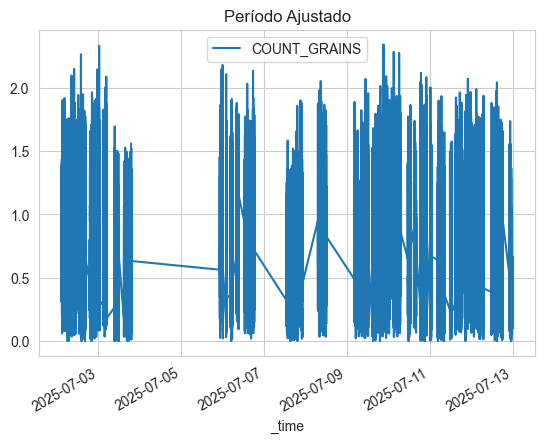

In [54]:
# Período ajustado apenas
start_date = "2025-07-02"
end_date = "2025-07-13"
DP_CTRL = DP_CTRL[(DP_CTRL["_time"] >= start_date) & (DP_CTRL["_time"] <= end_date)]
DP_CTRL.to_pickle("DP_CTRL_note.pkl")

DP_CTRL.plot(x="_time", y="COUNT_GRAINS", title="Período Ajustado")

# Todos os dados
# DP_CTRL.plot(x="_time", y="COUNT_GRAINS", title="Todos os dados")

In [55]:
DP_series = DP_CTRL.groupby("Controle Secagem")["COUNT_GRAINS"].apply(list)
DP_series

Controle Secagem
366    [0.5499827049463853, 0.8330450824397555, 0.341...
368    [0.3872170337061378, 0.5911064990968139, 0.812...
372    [0.4244974826088628, 0.5223106191629194, 0.563...
374    [0.2673046619777854, 0.24520542680348978, 0.45...
376    [0.46792728390791344, 0.41412045044006307, 0.5...
379    [0.749260156039817, 0.5668934240362812, 0.3522...
380    [0.4733079672546984, 0.6875744648141742, 0.680...
382    [0.2621161458933856, 0.3034321073061993, 0.194...
384    [0.3051616126676659, 0.15603981705676623, 0.25...
416    [0.5640109151005035, 0.6197394211922058, 0.629...
418    [0.7348476113609286, 0.4177716284253815, 0.371...
421    [0.6708559129866636, 0.41738729390061113, 0.70...
424    [0.3280295168915024, 0.3656943003189977, 0.573...
427    [0.4817633267996465, 0.2782581959337408, 0.653...
438    [0.32053499365848037, 0.37376532533917517, 0.2...
441    [0.22445136246589037, 0.09127944963296052, 0.1...
446    [0.949882777969945, 0.4906030208693647, 0.6274...
458    [0.7135

In [56]:
# Medidas agregadas de COUNT_GRAINS para cada Controle Secagem
COUNT_CTRL = DP_CTRL.groupby("Controle Secagem")["COUNT_GRAINS"].sum().round()

COUNT_CTRL

Controle Secagem
366    2328.0
368    4782.0
372    4745.0
374    7881.0
376    9400.0
379    3020.0
380    3183.0
382    1799.0
384    7440.0
416    2799.0
418    5005.0
421    3844.0
424    2500.0
427    5361.0
438    5600.0
441    3951.0
446    4889.0
458    6298.0
461    4679.0
464    7526.0
467    4816.0
470    4905.0
473    8138.0
476    2489.0
480    5865.0
487    4128.0
491    4835.0
493    6630.0
496    7762.0
499    7505.0
504    8284.0
506    1767.0
Name: COUNT_GRAINS, dtype: float64

### Debulha

In [57]:
DB1_CTRL = match_timestamps(DF_BAYER, DF_DB1, debulha=True)
DB1_CTRL.to_pickle("DB1_CTRL_note.pkl")


DB1_CTRL.value_counts(subset="HYB_COD")

HYB_COD
DKB260PRO4    195667
DKB356PRO4    149516
DK77-02TRE    108113
DKB255PRO4     65977
AG9035PRO3     52838
8777PRO4       37736
AS1991PRO4     30849
8704PRO4       21783
AG8701PRO4     13922
Name: count, dtype: int64

In [ ]:
DB2_CTRL = match_timestamps(DF_BAYER, DF_DB2, debulha=True)

DB2_CTRL.value_counts(subset="HYB_COD")

In [ ]:
DB_series = pd.concat([DB1_CTRL.groupby("Controle Secagem")["UMIDADE"].apply(list), DB2_CTRL.groupby("Controle Secagem")["UMIDADE"].apply(list)])
DB_series

### Lotes

In [ ]:
cols_to_agg = ["HYB_COD", "BATCH_WEIGHT", "LAYER_HEIGHT", "DRYING_TIME", "INVERT_PERCENTAGE", "Ressecagem"]
df_lotes = DP_CTRL.groupby("Controle Secagem")[cols_to_agg].first()

df_lotes["COUNT_GRAINS"] = DP_series
df_lotes = df_lotes.join(DB_series, how="left").dropna()

df_lotes

In [ ]:
import pandas as pd

df_lotes_final = df_lotes[cols_to_agg].copy()

counts_df = pd.DataFrame(df_lotes["COUNT_GRAINS"].tolist(), index=df_lotes.index)
df_lotes_final["media_COUNT_GRAINS"] = counts_df.mean(axis=1)
df_lotes_final["std_dev_COUNT_GRAINS"] = counts_df.std(axis=1)
df_lotes_final["max_COUNT_GRAINS"] = counts_df.max(axis=1)
df_lotes_final["soma_COUNT_GRAINS"] = counts_df.sum(axis=1)

umidade_df = pd.DataFrame(df_lotes["UMIDADE"].tolist(), index=df_lotes.index)
Q1 = umidade_df.quantile(0.25, axis=1)
Q3 = umidade_df.quantile(0.75, axis=1)
df_lotes_final["umidade_IQR"] = Q3 - Q1

# (Opcional) Se você precisasse das outras métricas de umidade, elas também seriam vetorizadas:
# n_observacoes = 30
# df_lotes_final["umidade_inicial_media"] = umidade_df.iloc[:, :n_observacoes].mean(axis=1)
# df_lotes_final["umidade_final_media"] = umidade_df.iloc[:, -n_observacoes:].mean(axis=1)
# df_lotes_final["delta_umidade"] = df_lotes_final["umidade_final_media"] - df_lotes_final["umidade_inicial_media"]


df_lotes_final

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação (Spearman é recomendado)
matriz_corr = df_lotes_final.select_dtypes(include=["number"]).corr(method="spearman")

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação de Spearman entre Atributos de Lote")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["BATCH_WEIGHT", "LAYER_HEIGHT", "DRYING_TIME", "INVERT_PERCENTAGE"]


def generate_correlation_plots_subplots(df, column_to_use):
    # q=3 especifica que queremos tercis (0-33%, 33-66%, 66-100%).
    # retbins=True retorna os pontos de quebra dos tercis.
    df["Nivel_Contaminacao"], break_points = pd.qcut(df[column_to_use], q=3, labels=["Baixo", "Médio", "Alto"], retbins=True)

    fig, axes = plt.subplots(3, 1, figsize=(7, 24))

    fig.suptitle(f"Matriz de Correlação de Spearman por Nível de '{column_to_use}'", fontsize=18, y=1.02)

    labels = ["Baixo", "Médio", "Alto"]

    for i, label in enumerate(labels):
        filtered_df = df[df["Nivel_Contaminacao"] == label]
        numeric_df = filtered_df.select_dtypes(include=["number"]).drop(numeric_cols + ["std_dev_COUNT_GRAINS"], axis=1)
        matriz_corr = numeric_df.corr(method="spearman")
        sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[i])
        axes[i].set_title(f"Nível {label} (Entre {break_points[i]:.2f} e {break_points[i + 1]:.2f})")

    plt.tight_layout()
    plt.show()


for num_col in numeric_cols:
    generate_correlation_plots_subplots(df_lotes_final, num_col)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def gerar_grid_correlacao(
    dataframe: pd.DataFrame,
    analysis_cols: list,
    q: int = 3,
    labels: list = ["Baixo", "Médio", "Alto"],
    title: str = "Matriz de Correlação de Spearman por Nível de Variáveis",
    cols_to_drop_from_corr: list = ["BATCH_WEIGHT", "LAYER_HEIGHT", "DRYING_TIME", "INVERT_PERCENTAGE"],
):
    if len(labels) != q:
        raise ValueError(f"O número de 'labels' ({len(labels)}) deve ser igual ao valor de 'q' ({q}).")

    # --- Configuração da Figura ---
    n_rows = q
    n_cols = len(analysis_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6.5))
    fig.suptitle(title, fontsize=22, y=1.0)

    # Garante que 'axes' seja sempre uma matriz 2D para facilitar a indexação
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    # --- Loop de Plotagem ---
    for col_idx, column_to_use in enumerate(analysis_cols):
        df_temp = dataframe.copy()

        try:
            df_temp["Nivel_Analise"], break_points = pd.qcut(df_temp[column_to_use], q=q, labels=labels, retbins=True, duplicates="drop")
        except ValueError:
            print(f"Aviso: Não foi possível criar {q} quantis para a coluna '{column_to_use}'. Pulando esta coluna.")
            for row_idx in range(n_rows):  # Limpa os eixos não utilizados
                axes[row_idx, col_idx].set_visible(False)
            continue

        for row_idx, label in enumerate(labels):
            ax = axes[row_idx, col_idx]

            filtered_df = df_temp[df_temp["Nivel_Analise"] == label]

            # Colunas a serem removidas do cálculo de correlação
            cols_to_drop = analysis_cols + cols_to_drop_from_corr
            numeric_df = filtered_df.select_dtypes(include=["number"]).drop(columns=cols_to_drop, errors="ignore")

            matriz_corr = numeric_df.corr(method="spearman")

            show_yticklabels = True if col_idx == 0 else False

            sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax, annot_kws={"size": 10}, yticklabels=show_yticklabels)

            title_line1 = f"Análise por: '{column_to_use}'"
            title_line2 = f"Nível {label} ({break_points[row_idx]:.2f} a {break_points[row_idx + 1]:.2f})"
            ax.set_title(f"{title_line1}\n{title_line2}", fontsize=14)

    # --- Finalização ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()


gerar_grid_correlacao(df_lotes_final, analysis_cols=["BATCH_WEIGHT", "LAYER_HEIGHT", "DRYING_TIME", "INVERT_PERCENTAGE"])

In [ ]:
# Usando parâmetros customizados (dividindo em 2 níveis - quartis)
gerar_grid_correlacao(
    dataframe=df_lotes_final, analysis_cols=["BATCH_WEIGHT", "DRYING_TIME"], q=2, labels=["Abaixo da Mediana", "Acima da Mediana"], title="Análise de Correlação (Abaixo vs. Acima da Mediana)"
)

### Plots

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def generate_box_plots(df, column_to_use):
    # q=3 especifica que queremos tercis (0-33%, 33-66%, 66-100%).
    df["Nivel_Contaminacao"] = pd.qcut(df[column_to_use], q=3, labels=["Baixo", "Médio", "Alto"])

    contagem_lotes = df["Nivel_Contaminacao"].value_counts()

    # Cria a string para o subtítulo, garantindo a ordem correta
    subtitulo = f"Contagem de Lotes: Baixo ({contagem_lotes.get('Baixo', 0)}), Médio ({contagem_lotes.get('Médio', 0)}), Alto ({contagem_lotes.get('Alto', 0)})"

    plt.figure(figsize=(10, 6))

    sns.boxplot(
        x="Nivel_Contaminacao",
        y="umidade_IQR",
        data=df,
        order=["Baixo", "Médio", "Alto"],
    )

    # Adiciona títulos e rótulos para clareza
    plt.suptitle("Dispersão da Umidade (IQR) por Nível de Contaminação de Grãos", fontsize=16, y=0.97)
    plt.title(subtitulo, fontsize=12)
    plt.xlabel(f"Nível de {column_to_use}", fontsize=12)
    plt.ylabel("Variabilidade da Umidade (IQR)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()


generate_box_plots(df_lotes_final, "max_COUNT_GRAINS")
generate_box_plots(df_lotes_final, "media_COUNT_GRAINS")
generate_box_plots(df_lotes_final, "soma_COUNT_GRAINS")

In [ ]:
from scipy.stats import norm, kurtosis

# Set a style for better-looking plots
sns.set_style("whitegrid")


def cap_outliers(df, column):
    # Identify outlier boundaries using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df.copy()

    # "Cap" the outlier values at the lower and upper bounds
    df_capped[column] = np.clip(df_capped[column], a_min=lower_bound, a_max=upper_bound)

    return df_capped


def plot_distributions(df, column, df_name, bins=100):
    # Cap dos outliers
    df_capped = cap_outliers(df, column)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f"Análise do DataFrame {df_name}", fontsize=16)

    # Distribuição Real (KDE)
    sns.histplot(data=df_capped, x=column, kde=True, ax=axes[0], bins=bins)
    axes[0].set_title(f"Distribuição Real de {column}")
    axes[0].set_xlabel(f"{column}")
    axes[0].set_ylabel("Frequência")

    # Estima os parâmetros (média e desvio padrão)
    mu, sigma = norm.fit(df_capped[column])
    data_kurt = kurtosis(df_capped[column])

    # Plota o histograma dos dados
    sns.histplot(data=df_capped, x=column, bins=bins, stat="density", color="lightblue", label="Histograma dos Dados", ax=axes[1])

    # Cria a linha da distribuição normal ajustada
    xmin, xmax = axes[1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    axes[1].plot(x, p, "k", linewidth=2, label="Distribuição Normal Ajustada")

    # Parâmetros da figura
    axes[1].set_title(f"Distribuição Normal Ajustada de {column}\n(Média={mu:.2f}, Desvio Padrão={sigma:.2f}, Kurtosis={data_kurt:.2f})")
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Densidade")
    axes[1].legend()

    plt.tight_layout()

In [ ]:
def fit_batch_data(data_df, ids):
    individual_params = []
    for batch_id in ids:
        # Filter data for the current ID
        data_subset = data_df[data_df["Controle Secagem"] == batch_id]["UMIDADE"]

        # Ensure there is enough data to fit
        if len(data_subset) < 2:
            print(f"⚠️ Warning: Not enough data for ID '{batch_id}'. Skipping.")
            continue

        # Fit a normal distribution to the subset
        mu, sigma = norm.fit(data_subset)

        # Store the parameters (mean and standard deviation)
        individual_params.append({"id": batch_id, "mu": mu, "sigma": sigma})

        print(f"ID '{batch_id}': Mean = {mu:.4f}, Std Dev = {sigma:.4f}")

    # Extract all means and variances (sigma^2)
    mus = [p["mu"] for p in individual_params]
    variances = [p["sigma"] ** 2 for p in individual_params]
    n = len(individual_params)

    # Calculate the parameters of the final averaged distribution
    if n > 0:
        mu_final = np.mean(mus)
        variance_final = np.sum(variances) / (n**2)
        sigma_final = np.sqrt(variance_final)

        print(f"Number of distributions averaged: {n}")
        print("\n✅ Final Averaged Distribution:")
        print(f"   Final Mean = {mu_final:.4f}")
        print(f"   Final Std Dev = {sigma_final:.4f}")
        print("####################################\n")
    else:
        print("No distributions were fitted, cannot compute an average.")


In [ ]:
from scipy.stats import norm, kurtosis

# Set a style for better-looking plots
sns.set_style("whitegrid")


def cap_outliers(df, column):
    # Identify outlier boundaries using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df.copy()

    # "Cap" the outlier values at the lower and upper bounds
    df_capped[column] = np.clip(df_capped[column], a_min=lower_bound, a_max=upper_bound)

    return df_capped


def plot_distributions(df, column, df_name, bins=100):
    # Cap dos outliers
    df_capped = cap_outliers(df, column)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f"Análise do DataFrame {df_name}", fontsize=16)

    # Distribuição Real (KDE)
    sns.histplot(data=df_capped, x=column, kde=True, ax=axes[0], bins=bins)
    axes[0].set_title(f"Distribuição Real de {column}")
    axes[0].set_xlabel(f"{column}")
    axes[0].set_ylabel("Frequência")

    # Estima os parâmetros (média e desvio padrão)
    mu, sigma = norm.fit(df_capped[column])
    data_kurt = kurtosis(df_capped[column])

    # Plota o histograma dos dados
    sns.histplot(data=df_capped, x=column, bins=bins, stat="density", color="lightblue", label="Histograma dos Dados", ax=axes[1])

    # Cria a linha da distribuição normal ajustada
    xmin, xmax = axes[1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    axes[1].plot(x, p, "k", linewidth=2, label="Distribuição Normal Ajustada")

    # Parâmetros da figura
    axes[1].set_title(f"Distribuição Normal Ajustada de {column}\n(Média={mu:.2f}, Desvio Padrão={sigma:.2f}, Kurtosis={data_kurt:.2f})")
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Densidade")
    axes[1].legend()

    plt.tight_layout()

def fit_batch_data(data_df, ids):
    individual_params = []
    for batch_id in ids:
        # Filter data for the current ID
        data_subset = data_df[data_df["Controle Secagem"] == batch_id]["UMIDADE"]

        # Ensure there is enough data to fit
        if len(data_subset) < 2:
            print(f"⚠️ Warning: Not enough data for ID '{batch_id}'. Skipping.")
            continue

        # Fit a normal distribution to the subset
        mu, sigma = norm.fit(data_subset)

        # Store the parameters (mean and standard deviation)
        individual_params.append({"id": batch_id, "mu": mu, "sigma": sigma})

        print(f"ID '{batch_id}': Mean = {mu:.4f}, Std Dev = {sigma:.4f}")

    # Extract all means and variances (sigma^2)
    mus = [p["mu"] for p in individual_params]
    variances = [p["sigma"] ** 2 for p in individual_params]
    n = len(individual_params)

    # Calculate the parameters of the final averaged distribution
    if n > 0:
        mu_final = np.mean(mus)
        variance_final = np.sum(variances) / (n**2)
        sigma_final = np.sqrt(variance_final)

        print(f"Number of distributions averaged: {n}")
        print("\n✅ Final Averaged Distribution:")
        print(f"   Final Mean = {mu_final:.4f}")
        print(f"   Final Std Dev = {sigma_final:.4f}")
        print("####################################\n")
    else:
        print("No distributions were fitted, cannot compute an average.")


def analyse_hybrid(DP_CTRL, DF_DB_CTRL, HYB_COD):
    # Medida agregada de COUNT_GRAINS para cada Controle Secagem (estimativa da quantidade de grãos dentro de cada camara)
    COUNT_CTRL = DP_CTRL.groupby("Controle Secagem")["COUNT_GRAINS"].sum().round()

    # Debulha filtrada por híbrido
    DB_CTRL_HYB = DF_DB_CTRL[DF_DB_CTRL["HYB_COD"] == HYB_COD]

    # Medidas de COUNT_GRAINS do híbrido
    COUNT_CTRL_HYB = COUNT_CTRL[COUNT_CTRL.index.isin(DB_CTRL_HYB["Controle Secagem"].unique())]

    # Plot teste com o Controle Secagem com a menor e a maior contagem de grãos
    if len(COUNT_CTRL_HYB) != 0:
        plot_distributions(DB_CTRL_HYB[DB_CTRL_HYB["Controle Secagem"] == COUNT_CTRL_HYB.idxmin()], "UMIDADE", f"{HYB_COD}_MIN", bins=30)
        plot_distributions(DB_CTRL_HYB[DB_CTRL_HYB["Controle Secagem"] == COUNT_CTRL_HYB.idxmax()], "UMIDADE", f"{HYB_COD}_MAX", bins=30)

    # Separar em dois grupos de distribuições menor e maior que mediana de COUNT_GRAINS para verificar um comportamento mais global
    CTRL_HIGH_HYB = COUNT_CTRL_HYB.loc[COUNT_CTRL_HYB >= COUNT_CTRL_HYB.median()].index.to_list()
    CTRL_LOW_HYB = COUNT_CTRL_HYB.loc[COUNT_CTRL_HYB < COUNT_CTRL_HYB.median()].index.to_list()

    # Fit de uma normal para cada Controle Secagem e cálculo da distribuição global
    print(f"GRUPO HIGH_COUNT {HYB_COD}\n")
    fit_batch_data(DB_CTRL_HYB, CTRL_HIGH_HYB)
    print(f"GRUPO LOW_COUNT {HYB_COD}\n")
    fit_batch_data(DB_CTRL_HYB, CTRL_LOW_HYB)

In [ ]:
for hyb in DB1_CTRL["HYB_COD"].unique():
    analyse_hybrid(DP_CTRL, DB1_CTRL, hyb)

In [ ]:
# TODO: Filtrar apenas o periodo ajustado? Não ajudou kkkk
# TODO: Tabela com medias e std devs e dps alguma regressão